## Bike-Sharing Program

In [224]:
import pandas as pd
import numpy as np
import sys
import pandas as pd
import numpy as np
import bokeh.plotting as bkp
import json
import gmaps
import gmaps.datasets
#gmaps.configure(api_key = )
from pandas.io.json import json_normalize
import os.path
import scipy.stats as stats
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from datetime import datetime
import calendar
from collections import Counter
import pylab
from scipy import stats
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot as pl, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline
import ggplot

WRANGLING

LOAD ALL FILES INTO INDIVIDUAL DATA FRAMES AND LOOK FOR COMMONALITIES

#Ways to choose a data science project: https://www.dataquest.io/blog/free-datasets-for-projects/

Datasets you can look at which people have worked on for their capstone:

Bike sharing demand: https://www.kaggle.com/c/bike-sharing-demand regression problem, random forest, svm straight forward, good project to do, shortest amount of time
wrangling https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends can also check out kaggle kernel
in ch3 or ch5 of this repository: clustering using PCA and matplotlib to plot out the clusters using fmean propogation instead of k-means, but can use k-means also

visualization https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends

stats: https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends

ML: https://github.com/dipanjanS/practical-machine-learning-with-python/tree/master/notebooks/Ch06_Analyzing_Bike_Sharing_Trends

Fashion clothing categorization: https://www.kaggle.com/zalando-research/fashionmnist deep learning, convolution neural networks, and computer vision, classification problem,
Cryptocurrency analysis: https://www.kaggle.com/shelars1985/bitcoin-vs-ethereum-candlestick-chart-at-the-end https://www.kaggle.com/astandrik/cryptocurrency-analysis-will-ethereum-lead time series forecasting, ways to predict the prices

Yelp reviews: https://www.kaggle.com/yelp-dataset/yelp-dataset NLP, sentiment analysis, text classification,

Regards,

In [225]:
#os.path.join

clean_dir = '/home/skultra/Springboard/Code/Capstone_2/bike_sharing_data'

In [226]:
test_data = os.path.join(clean_dir, 'test.csv')
train_data = os.path.join(clean_dir, 'train.csv')


In [227]:
#test data
test = pd.read_csv(test_data)
#train data
train = pd.read_csv(train_data)


In [228]:
test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [229]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


Hypothesis: Demand increase during the following: season(1-3), workingday:0, weather(1-2), temp(50-90 F), humidity(0-90)

In [230]:
train.shape

(10886, 12)

In [231]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [232]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [233]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [245]:

train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
train["month"] = train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
train['season_num'] = train['season']
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train['weather_num'] = train['weather']
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })


In [246]:
category = ['hour', 'weekday', 'month', 'season', 'season_num', 'weather', 'holiday', 'workingday', 'weather_num'] 

for cat in category: 
    train[cat] = train[cat].astype('category')


            

In [247]:
#train  = train.drop(["datetime"],axis=1)

VISUALIZATIONS


In [248]:
cf.set_config_file(offline=True)
#df_dict = {}

df_dict = Counter(train['hour'])
df = pd.DataFrame([df_dict])
#df['Count'] = df_dict.values()
#df['Hour'] = df_dict.keys()
#df.set_index('Hour')
df.iplot(kind='box', filename= '/cufflinks/box-plot-hour.html')
#df = pd.DataFrame.from_dict(list(df_dict.items()), columns=['Hour', 'Count'])
#df.iplot(kind='box', filename = (os.path.join(clean_dir, '/box-plot-hour')))
#go.Box(data=train, x = 'season', y='count')
#go.Box(data=train, x = 'workingday', y='count')
#sns.factorplot(data=train, x = 'month', y='count')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [249]:

sns.pointplot(x='hour', y='count', data=train[['hour', 'count', 'season']], hue='season')

  
#df = pd.DataFrame(columns=
#df['Hours'] = train['hour']
#df['Count'] = train['count']
#print(df)

ValueError: min() arg is an empty sequence


Spring seems to be the lowest usage, as logic would dictate, usage peaks in the early hours of the morning and peaks after the workday. 

In [250]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime       10886 non-null object
season         0 non-null category
holiday        10886 non-null category
workingday     10886 non-null category
weather        0 non-null category
temp           10886 non-null float64
atemp          10886 non-null float64
humidity       10886 non-null int64
windspeed      10886 non-null float64
casual         10886 non-null int64
registered     10886 non-null int64
count          10886 non-null int64
date           10886 non-null object
hour           10886 non-null category
weekday        10886 non-null category
month          10886 non-null category
season_num     10886 non-null category
weather_num    10886 non-null category
year           10886 non-null object
dtypes: category(9), float64(3), int64(4), object(3)
memory usage: 948.5+ KB
None


In [251]:
#insert heatmap using plotly

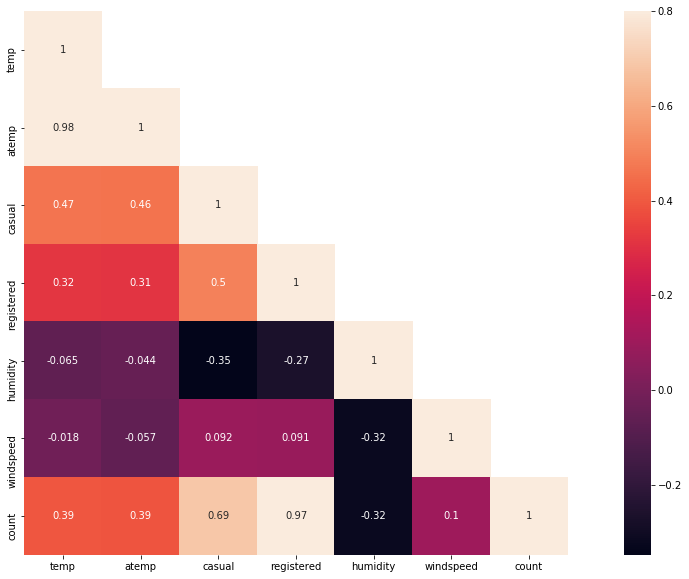

In [252]:
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots() 
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

RF AND REGRESSOR

In [253]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
train["year"] = train.datetime.apply(lambda x : x.split()[0].split("-")[0])
train["weekday"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [254]:
cols = ['season', 'season_num', 'holiday', 'workingday', 'weather_num', 'hour', 'weekday', 'month']
rf = RandomForestRegressor(n_estimators=20)
rf.fit(train[cols], train['count'])

r2 = r2_score(train['count'], rf.predict(test[cols]))
mse = np.mean((train['count'] - rf.predict(train[cols]))**2)

    


ValueError: could not convert string to float: ' Clear + Few clouds + Partly cloudy + Partly cloudy'